In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, savgol_filter
import re
import csv
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Ajusta el número de núcleos que deseas usar


In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()

## KNN

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Cargar la matriz de características desde el archivo CSV
matriz_caract = pd.read_csv('matriz_caract.csv').values  # Convertimos a numpy array

# 2. Convertir los valores de OSNR en etiquetas binarias usando un umbral
umbral3 = 23
y_binary3 = (matriz_caract[:, -1] > umbral3).astype(int)  # OSNR es la última columna

# 3. Crear una matriz de características que excluya la columna de OSNR
matriz_caract_sin_OSNR = matriz_caract[:, :-1]  # Todas las columnas menos la última

# 4. Normalizar los datos utilizando z-scores
scaler = StandardScaler()
X_normalized = scaler.fit_transform(matriz_caract_sin_OSNR)

# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train_binary3, y_test_binary3 = train_test_split(
    X_normalized, y_binary3, test_size=0.3, random_state=69, shuffle=True
)

# 6. Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

# 7. Crear el modelo KNN
knn = KNeighborsClassifier()

# 8. Configurar GridSearchCV
grid_search3 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,
                            scoring='accuracy')

# 9. Entrenar el modelo utilizando GridSearchCV
grid_search3.fit(X_train3, y_train_binary3)

# 10. Imprimir los mejores hiperparámetros encontrados
print("Best Hyperparameters:", grid_search3.best_params_)

# 11. Hacer predicciones utilizando el mejor modelo
best_knn3 = grid_search3.best_estimator_
y_pred_binary3 = best_knn3.predict(X_test3)

# 12. Evaluar el modelo utilizando métricas de clasificación
cm3 = confusion_matrix(y_test_binary3, y_pred_binary3)
accuracy3 = accuracy_score(y_test_binary3, y_pred_binary3)

print("Confusion Matrix cantidad:")
print(cm3)
print("Accuracy:", accuracy3)

# 13. (Opcional) Asegurarte de que las listas existan antes de usarlas
try:
    accuracy_spacing.append(accuracy3)
    KNN_spacing.append(accuracy3)
except NameError:
    # Si las listas no existen, las crea
    accuracy_spacing = [accuracy3]
    KNN_spacing = [accuracy3]


Best Hyperparameters: {'n_neighbors': 5}
Confusion Matrix cantidad:
[[ 31  61]
 [ 12 225]]
Accuracy: 0.7781155015197568


In [4]:
#definición listas que contienen accuracy
accuracy_spacing = []
accuracy_sin_spacing = []
KNN_spacing = []
SVM_spacing = []
RF_spacing = []
KNN_nospacing = []
SVM_nospacing = []
RF_nospacing = []

Matriz de confusión normalizada


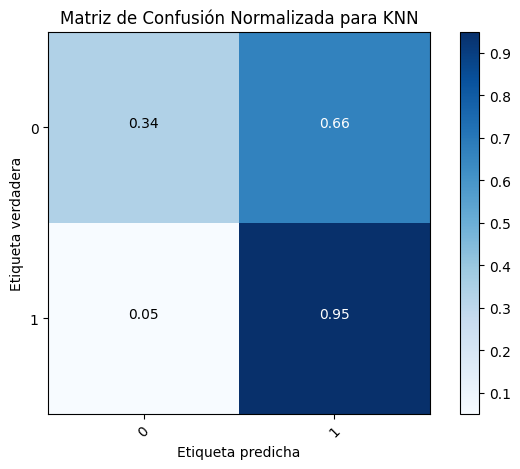

In [5]:
# Graficar la matriz de confusión
#class_names = np.unique(y_binary3)
# 9. Graficar la matriz de confusión
#este muestra mejor
class_names = np.unique(y_test_binary3)
plot_confusion_matrix(cm3, classes=class_names, normalize=True, 
                      title='Matriz de Confusión Normalizada para KNN')

In [6]:
### Especificidad o precision
pre = precision_score(y_test_binary3, y_pred_binary3)
print(f'Precision general del modelo: {pre:.4f}')

Precision general del modelo: 0.7867


In [7]:
### Sensibilidad
sensi = recall_score(y_test_binary3, y_pred_binary3)
print(f'Sensibilidad general del modelo: {sensi:.4f}')

Sensibilidad general del modelo: 0.9494


In [8]:
### F1-Score
puntaje = f1_score(y_test_binary3, y_pred_binary3)
print(f'El puntaje general del modelo: {puntaje:.4f}')

El puntaje general del modelo: 0.8604


In [9]:
# Cargar como DataFrame para ver las correlaciones
df = pd.read_csv('matriz_caract.csv')

# Calcular la matriz de correlación
correlaciones = df.corr()

# Ver correlación de cada columna con OSNR
print(correlaciones.iloc[:-1, -1])  # Todas menos OSNR contra OSNR


-3.584335280631602      -0.135749
-1.1336656641391478      0.023118
0.7600335849686575       0.107295
3.3220972749380415       0.156362
-3.2998751765747927     -0.183670
-1.0676710442701696     -0.070020
0.6945953759703221       0.054834
3.1617683643070107       0.222411
-2.4703945458623044      0.049926
-0.13111900284678057     0.003578
2.3195506136456743      -0.022661
-2.2425153244304976      0.005418
-0.010311192125874946    0.033234
2.2218929401787486       0.037875
11.139407347692973      -0.352031
11.748442801603279      -0.349170
29.0                    -0.207646
Name: 30.02, dtype: float64


## SVM

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [11]:
# Convertir la lista en una matriz de numpy
matriz_caract1 = np.array(matriz_caract)
# Verificar la forma de la matriz
print("Shape de la matriz:", matriz_caract1.shape)  # Debería ser (71, 19)

# Convertir la matriz en un DataFrame de pandas
df = pd.DataFrame(matriz_caract1)

# Guardar el DataFrame en un archivo CSV
df.to_csv('matriz_caract.csv', index=False, header=False)

Shape de la matriz: (1095, 18)


In [12]:
# 1. Cargar la matriz de características desde el archivo CSV
matriz_caract = pd.read_csv('matriz_caract.csv').values  # Convertimos a numpy array

In [13]:
# 1. Convertir los valores de OSNR en etiquetas binarias usando un umbral
umbral3 = 23 #Mínimo OSNR necesario para una demodulación buena para 16QAM
y_binary3 = (matriz_caract1[:, -1] > umbral3).astype(int)

# 2. Crear una matriz de características que excluya la columna de OSNR
matriz_caract_sin_OSNR = matriz_caract1[:, :-1]  # Todas las columnas menos la última
# 3. Normalizar los datos utilizando z-scores
scaler = StandardScaler()
X_normalized = scaler.fit_transform(matriz_caract_sin_OSNR)

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train_binary3, y_test_binary3 = train_test_split(X_normalized,
                                                                      y_binary3,
                                                                      test_size=0.3, 
                                                                      random_state=69, 
                                                                      shuffle = True)



# 5. Definir el espacio de búsqueda de hiperparámetros
parametros = {
    'C': [0.1, 1, 10],
    'degree': [2, 5, 8],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'auto']
}

# 6. Crear el modelo SVM
svm = SVC()

# 7. Configurar GridSearchCV
grid_search = GridSearchCV(svm, parametros, cv=5)

# 8. Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train3, y_train_binary3)

# 9. Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# 10. Imprimir la mejor puntuación de validación cruzada
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

# 11. Hacer predicciones utilizando el mejor modelo
best_svm = grid_search.best_estimator_
y_pred_binary3 = best_svm.predict(X_test3)

# 12. Evaluar el modelo utilizando métricas de clasificación
cm3 = confusion_matrix(y_test_binary3, y_pred_binary3)
accuracy3 = accuracy_score(y_test_binary3, y_pred_binary3)

print("Confusion Matrix:")
print(cm3)
print("Accuracy:", accuracy3)
accuracy_spacing.append(accuracy3)
SVM_spacing.append(accuracy3)

Mejores hiperparámetros: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor puntuación de validación cruzada: 0.8341057635175282
Confusion Matrix:
[[ 66  26]
 [ 13 224]]
Accuracy: 0.8814589665653495


In [14]:
model = SVC(C=1, kernel='rbf', gamma='auto')
model.fit(X_train3, y_train_binary3)

SVC(C=1, gamma='auto')

In [15]:
y_pred3 = model.predict(X_test3)
cm_svm = confusion_matrix(y_test_binary3, y_pred3,normalize='true')
print(cm_svm)

[[0.57608696 0.42391304]
 [0.02953586 0.97046414]]


In [16]:
print(model)

SVC(C=1, gamma='auto')


Matriz de confusión normalizada


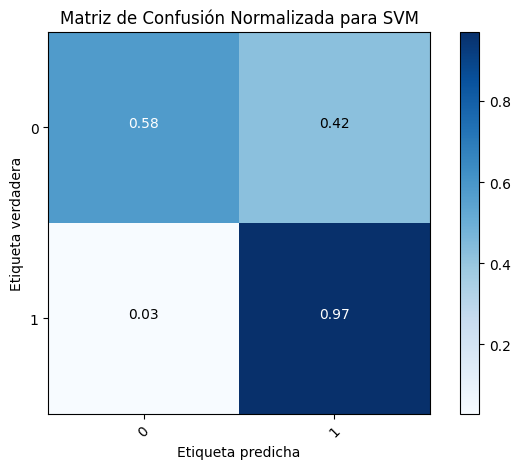

In [17]:
class_names = np.unique(y_train_binary3)
plot_confusion_matrix(cm_svm, classes=class_names, normalize=True, 
                      title='Matriz de Confusión Normalizada para SVM')

In [18]:
### Accuracy
exac = accuracy_score(y_test_binary3,y_pred3)
print(f'Exactitud del modelo: {exac:.4f}')

Exactitud del modelo: 0.8602


In [19]:
### Especificidad o precision
pre = precision_score(y_test_binary3,y_pred3)
print(f'Presicion general del modelo: {pre:.4f}')

Presicion general del modelo: 0.8550


In [20]:
### Sensibilidad
sensi = recall_score(y_test_binary3,y_pred3)
print(f'Sensibilidad general del modelo: {sensi:.4f}')

Sensibilidad general del modelo: 0.9705


In [21]:
### F1-Score
puntaje = f1_score(y_test_binary3,y_pred3)
print(f'El puntaje general del modelo: {puntaje:.4f}')

El puntaje general del modelo: 0.9091


## Algoritmo RDF

In [22]:
model = RandomForestClassifier()
model.fit(X_train3, y_train_binary3)

RandomForestClassifier()

In [23]:
y_pred3 = model.predict(X_test3)
cm_f = confusion_matrix(y_test_binary3, y_pred3,normalize='true')
print(cm_f)

[[0.70652174 0.29347826]
 [0.02953586 0.97046414]]


Matriz de confusión normalizada


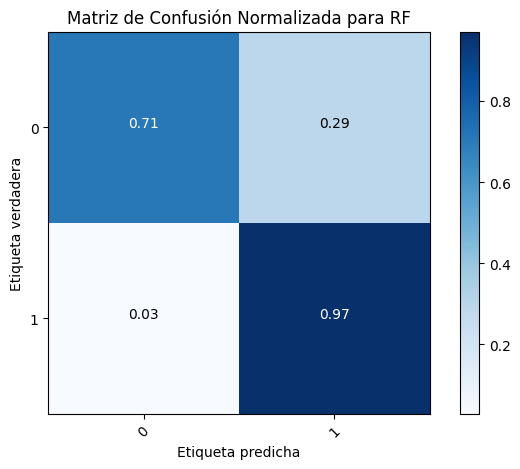

In [24]:
class_names = np.unique(y_train_binary3)
plot_confusion_matrix(cm_f, classes=class_names, normalize=True,
                      title='Matriz de Confusión Normalizada para RF')

In [25]:
### Accuracy
exac = accuracy_score(y_test_binary3,y_pred3)
print(f'Exactitud del modelo: {exac:.4f}')
accuracy_spacing.append(exac)
RF_spacing.append(exac)

Exactitud del modelo: 0.8967


In [26]:
### Especificidad o precision
pre = precision_score(y_test_binary3,y_pred3)
print(f'Presicion general del modelo: {pre:.4f}')

Presicion general del modelo: 0.8949


In [27]:
### Sensibilidad
sensi = recall_score(y_test_binary3,y_pred3)
print(f'Sensibilidad general del modelo: {sensi:.4f}')

Sensibilidad general del modelo: 0.9705


In [28]:
### F1-Score
puntaje = f1_score(y_test_binary3,y_pred3)
print(f'El puntaje general del modelo: {puntaje:.4f}')

El puntaje general del modelo: 0.9312
